<font color=red>Sum和Diag对学习率的耐受分别依赖于：max(1/min(correction_vector))和max(1/min(Diag(W)))</font>

In [1]:
import torch
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *

A的第二大特征值: 0.7263966096936311
A的beta: 0.8796440836542804
A的spectral gap: 0.12035591634571963
A的kappa: 3.875182682187834
S_A是: 103.52074399465755 

B的第二大特征值: 0.7266166919829303
B的beta: 0.8799715542776193
B的spectral gap: 0.1200284457223807
B的kappa: 3.7788382448179307
S_B是: 102.6932747255178 



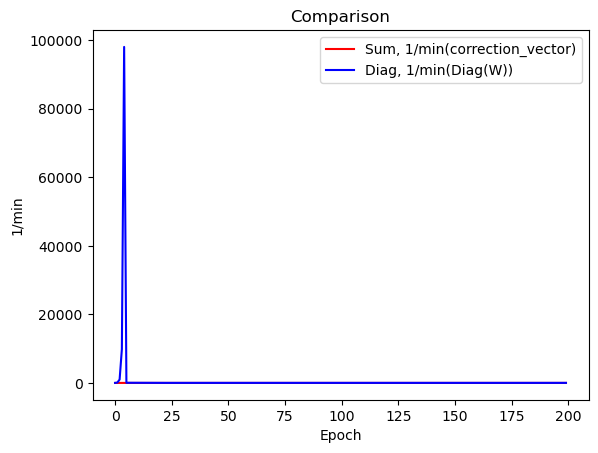

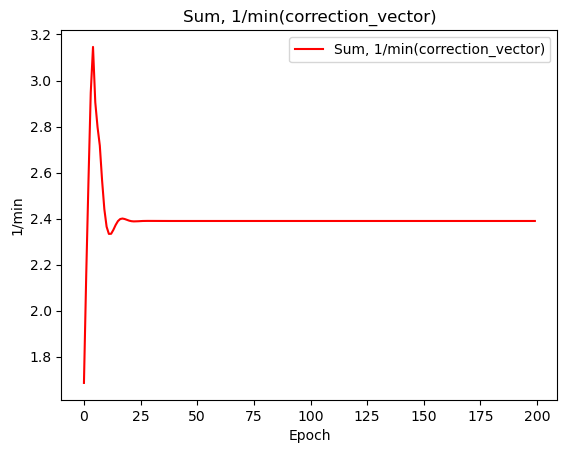

3.1459587231295374   98013.25153431598


In [2]:
n=7
d=784
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=47191).T #92,241,3287,11762,30667,47191
A=0.9*A+0.1*I
B=get_B(A=A,u=2*n,n=n)
show_row(A)
show_col(B)
epochs=200
_,__=test_row(A=A,epochs=epochs,if_plot=True)
print(_,' ',__)

In [3]:
index,value=0,10
for i in tqdm(range(40000,100000), desc="Training Progress"):
    A=get_xinmeng_like_matrix(n,seed=i).T
    epochs=500
    _,__=test_row(A=A,epochs=50,if_plot=False)
    if __ > value and _ < 4:
        index,value=i,__
print(index,value)

Training Progress: 100%|██████████| 60000/60000 [00:20<00:00, 2891.02it/s]

47191 5.613548852223199e+16


<font color=blue>也就是说，可以选取随机种子，来让Sum的metric很小，从而可以有较大的学习率；让Diag的metric很大，必须要很小的学习率</font>

Training Progress: 100%|██████████| 200/200 [00:29<00:00,  6.85it/s, accuracy=96.1856522638%, epoch=200, loss=0.1948937944]


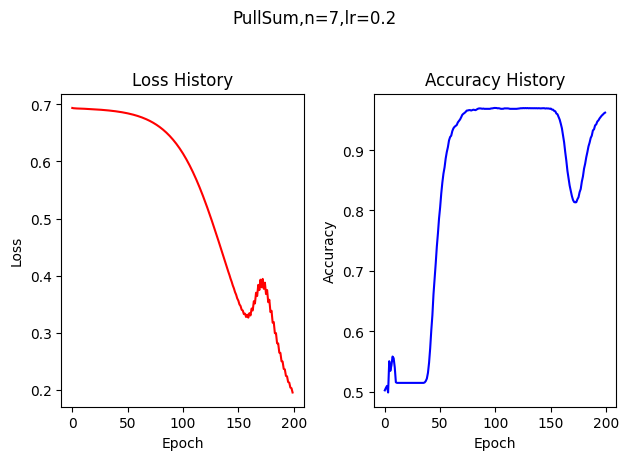

In [16]:
l1,a1=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.2/n))

Training Progress: 100%|██████████| 500/500 [01:25<00:00,  5.86it/s, accuracy=51.4471780029%, epoch=500, loss=0.6914747272]


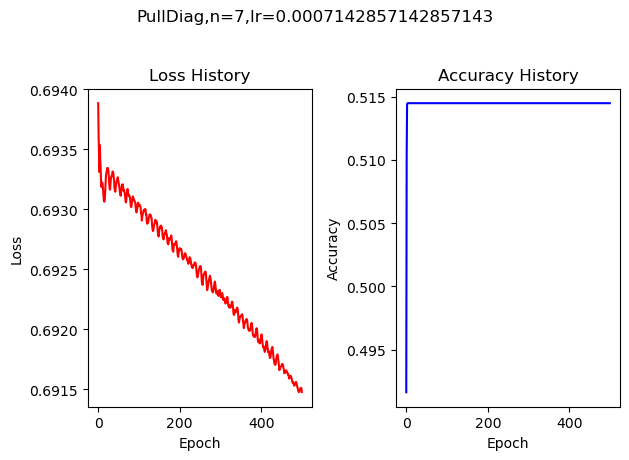

In [10]:
L1,A1=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(5e-3/n)) 